In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Энтропия по Шеннону

![](https://habrastorage.org/files/c96/80a/a4b/c9680aa4babc40f4bbc8b3595e203979.png)

In [2]:
import math

def entropy(arr):
    probs = [arr.count(i)/len(arr) for i in list(set(arr))]
    return sum([-math.log(i, 2)*i for i in probs])

a = [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]

entropy(a)

0.9927744539878084

In [3]:
entropy(a[13:])

0.5916727785823275

In [4]:
entropy(a[:13])

0.961236604722876

![](https://habrastorage.org/r/w1560/storage2/785/21c/7c6/78521c7c61114d0c433d76cb4f282f15.png)

In [ ]:
a = [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
entr = entropy(a)

igs = []
appending = []
for i in range(1, len(a)):
    arr1 = a[:i]
    arr2 = a[i:]    
    print('split by x<=', i)
    appending.append('split by x<='+ str(i))
    print('entropies:', entropy(arr1), entropy(arr2))
    print('ig =', entr - (len(arr1)/len(a))*entropy(arr1) - (len(arr2)/len(a))*entropy(arr2))
    igs.append(entr - (len(arr1)/len(a))*entropy(arr1) - (len(arr2)/len(a))*entropy(arr2))
    print('---------------------')

split by x<= 1
entropies: 0.0 0.9980008838722996
ig = 0.044673614309123866
---------------------
split by x<= 2
entropies: 1.0 0.9910760598382222
ig = 0.0008060001334083688
---------------------
split by x<= 3
entropies: 0.9182958340544896 0.9774178175281716
ig = 0.024224933980689145
---------------------
split by x<= 4
entropies: 0.8112781244591328 0.9544340029249649
ig = 0.06697162675600987
---------------------
split by x<= 5
entropies: 0.7219280948873623 0.9182958340544896
ig = 0.12357055472510059
---------------------
split by x<= 6
entropies: 0.9182958340544896 0.9402859586706309
ig = 0.05908553270201988
---------------------
split by x<= 7
entropies: 0.9852281360342516 0.961236604722876
ig = 0.023140813305950858
---------------------
split by x<= 8
entropies: 1.0 0.9798687566511527
ig = 0.004853199997116753
---------------------
split by x<= 9
entropies: 0.9910760598382222 0.9940302114769565
ig = 7.361074828227121e-05
---------------------
split by x<= 10
entropies: 1.0 0.970950

## Максимизация энтропии

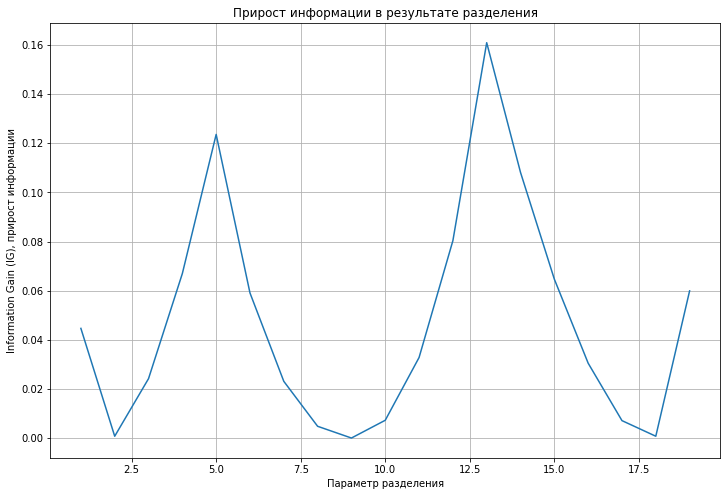

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot([i for i in range(1, 20)], igs)
ax.set_title('Прирост информации в результате разделения')
ax.set_ylabel('Information Gain (IG), прирост информации')
ax.set_xlabel(r'Параметр разделения')
ax.grid(True)
plt.show()

# Релазиация целого дерева

In [ ]:
# на основе https://habr.com/ru/company/mailru/blog/438560/
from sklearn.metrics import mean_squared_error

class RegressionTree():
    
    '''
    Класс RegressionTree решает задачу регрессии. Основан на рекурсивных
    вызовах, когда прописываются условия выхода из рекурсии. 
    '''
    
    def __init__(self, max_depth=3, n_epoch=10, min_size=8):
        
        '''
        Объявляем переменные класса.
        '''

        self.max_depth = max_depth # максимальная глубина
        self.min_size = min_size # минимальный размер поддерева
        self.value = 0 # значение в поддереве (среднее по всем листьям)
        self.feature_idx = -1 # номер лучшего признака
        self.feature_threshold = 0 # значение лучшего признака
        self.left = None # левый потомок
        self.right = None # правый потомок
        
    def fit(self, X, y):
        
        '''
        Процедура обучения дерева. На выходе получим обученную модель.
        '''
        
        # инициализируем начальные значения
        self.value = y.mean()
        base_error = ((y - self.value) ** 2).sum()
        error = base_error
        flag = 0
        
        # ошибки в левом и правом поддереве
        prev_error_left = base_error
        prev_error_right = 0
        
        # если дошли до глубины 0 - выходим
        if self.max_depth <= 1:
            return
    
        dim_shape = X.shape[1]
        
        # значения в левом и правом поддереве
        left_value = 0
        right_value = 0
        
        # начинаем цикл по признакам
        for feat in range(dim_shape):
            
            # сортируем признаки
            idxs = np.argsort(X[:, feat])
            
            # количество сэмплов в левом и правом поддереве
            N = X.shape[0]
            N1, N2 = N, 0
            thres = 1
            
            # начинаем проходиться по значениям признака
            while thres < N - 1:
                N1 -= 1
                N2 += 1
                
                idx = idxs[thres]
                x = X[idx, feat]
                
                # пропускаем одинаковые признаки
                if thres < N - 1 and x == X[idxs[thres + 1], feat]:

                    thres += 1
                    continue
                
                # данные, которые получаются у нас в результате такого сплита
                target_right = y[idxs][:thres]
                target_left = y[idxs][thres:]
                mean_right = y[idxs][:thres].mean(), 
                mean_left = y[idxs][thres:].mean()
                
                # на этом шаге уже нужно считать ошибку - 
                # генерируем предикты (среднее в потомках)
                left_shape = target_left.shape[0]
                right_shape = target_right.shape[0]
                mean_left_array = [mean_left for _ in range(left_shape)]
                mean_right_array = [mean_right for _ in range(right_shape)]
                
                # считаем ошибку слева и справа
                prev_error_left = N1/N * mean_squared_error(target_left, mean_left_array) 
                prev_error_right = N2/N * mean_squared_error(target_right, mean_right_array)
                
                # если выполняются условия сплита, то обновляем
                if (prev_error_left + prev_error_right < error):
                    if (min(N1,N2) > self.min_size):
                        self.feature_idx = feat
                        self.feature_threshold = x
                        left_value = mean_left
                        right_value = mean_right

                        flag = 1
                        error = prev_error_left + prev_error_right
                                     
                thres += 1
        
        # если не нашли лучший сплит, выходим
        if self.feature_idx == -1:
            return
        
        # дошли сюда - есть хорошее разбиение, нужно обучать дальше
        # инициализируем потомков - те же деревья решений
        self.left = RegressionTree(self.max_depth - 1)
        self.left.value = left_value
        self.right = RegressionTree(self.max_depth - 1)
        self.right.value = right_value
        
        # индексы потомков
        idxs_l = (X[:, self.feature_idx] > self.feature_threshold)
        idxs_r = (X[:, self.feature_idx] <= self.feature_threshold)
        
        # обучаем
        self.left.fit(X[idxs_l, :], y[idxs_l])
        self.right.fit(X[idxs_r, :], y[idxs_r])
        
    def __predict(self, x):
        
        '''
        Функция для генерирования предсказания - смотрим узлы, идем 
        в соответствующих  потомков и смотрим в конце self.value - это
        и будет ответом.
        '''
        
        if self.feature_idx == -1:
            return self.value
        
        if x[self.feature_idx] > self.feature_threshold:
            return self.left.__predict(x)
        else:
            return self.right.__predict(x)
        
    def predict(self, X):
        
        '''
        Предикт для матрицы - просто для каждой строчки вызываем __predict().
        '''
        
        y = np.zeros(X.shape[0])
        
        for i in range(X.shape[0]):
            y[i] = self.__predict(X[i])
            
        return y

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

data = datasets.fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [ ]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['price'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
%%time
A = RegressionTree(2) # это наш алгоритм
A.fit(X_train, y_train)

CPU times: user 9min 57s, sys: 1.68 s, total: 9min 58s
Wall time: 10min 1s


In [ ]:
preds = A.predict(X_test)
preds

array([1.74450374, 1.74450374, 1.74450374, ..., 1.74450374, 3.35601725,
       3.35601725])

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, preds)

0.2886017442563197

In [ ]:
%%time
model = DecisionTreeRegressor(max_depth=2)
 # из Sklearn
model.fit(X_train, y_train)

CPU times: user 26 ms, sys: 0 ns, total: 26 ms
Wall time: 25.8 ms


DecisionTreeRegressor(max_depth=2)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, model.predict(X_test))

0.44249111434804134

In [ ]:
from sklearn.model_selection import GridSearchCV

# перебираем глубину
# перебираем мин кол-во для разделения
# максимально кол-во признаков для более случайной выборки
param_grid = {'max_depth': [i for i in range(2, 15)],
              'min_samples_split': [i for i in range(2, 10)],
              'max_features': [2, len(X_train[0])-1]}

# инициализируем случайный лес с перебором по кросс-вал на выбранных выше праметрах
gs = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)
gs.fit(X_train, y_train)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 208 candidates, totalling 1040 fits


({'max_depth': 9, 'max_features': 7, 'min_samples_split': 5},
 0.6932450945075799)

In [ ]:
# по умолчанию grid search refit-ит лучшую модель для predict
r2_score(y_test, gs.predict(X_test))

0.6949436706699946

# Коробочные реализации на более реальных данных

Данные:

https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes?select=bmw.csv

## EDA

In [ ]:
import os

data = []
for file_ in os.listdir('./data'):
    df = pd.read_csv('./data/' + file_)
    data.append(df)

df = pd.concat(data, axis=0)
df.to_csv('./results.csv', index=False)

In [ ]:
df = pd.read_csv('https://dl.uploadgram.me/6081b6b3d5d36h?raw').drop(columns=['Unnamed: 0'])
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,5,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,fuel type,engine size,mileage2,fuel type2,engine size2,reference,tax(£)
0,T-Roc,2019.0,25000,Automatic,13904,Diesel,145.0,49.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T-Roc,2019.0,26883,Automatic,4562,Diesel,145.0,49.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T-Roc,2019.0,20000,Manual,7414,Diesel,145.0,50.4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T-Roc,2019.0,33492,Automatic,4825,Petrol,145.0,32.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T-Roc,2019.0,22900,Semi-Auto,6500,Petrol,150.0,39.8,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118145,I30,2016.0,8680,Manual,25906,Diesel,NaN,78.4,1.6,NaN,NaN,NaN,NaN,NaN,NaN,0.0
118146,I40,2015.0,7830,Manual,59508,Diesel,NaN,65.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,30.0
118147,I10,2017.0,6830,Manual,13810,Petrol,NaN,60.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0
118148,Tucson,2018.0,13994,Manual,23313,Petrol,NaN,44.8,1.6,NaN,NaN,NaN,NaN,NaN,NaN,145.0


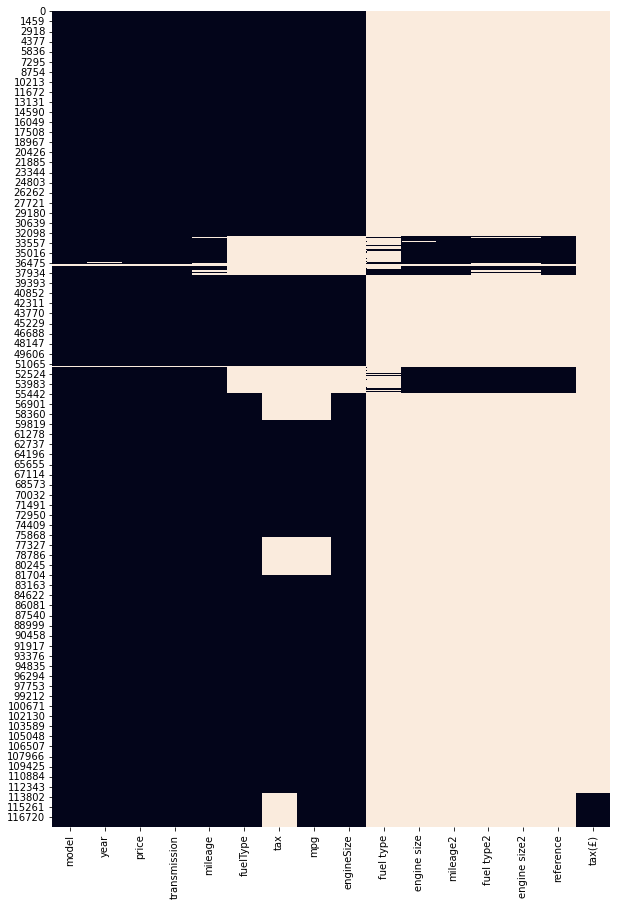

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize = (10, 15))
sns.heatmap(df.isnull(), cbar=False)

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,T-Roc,2019.0,25000,Automatic,13904,Diesel,145.0,49.6,2.0
1,1,T-Roc,2019.0,26883,Automatic,4562,Diesel,145.0,49.6,2.0
2,2,T-Roc,2019.0,20000,Manual,7414,Diesel,145.0,50.4,2.0
3,3,T-Roc,2019.0,33492,Automatic,4825,Petrol,145.0,32.5,2.0
4,4,T-Roc,2019.0,22900,Semi-Auto,6500,Petrol,150.0,39.8,1.5
...,...,...,...,...,...,...,...,...,...,...
113285,113285,Tigra,2007.0,2499,Manual,48640,Petrol,165.0,46.3,1.4
113286,113286,Vectra,2007.0,1795,Manual,75000,Petrol,240.0,39.2,1.8
113287,113287,Vectra,2005.0,1495,Manual,74000,Petrol,235.0,38.7,1.8
113288,113288,Vectra,2008.0,1695,Automatic,131000,Diesel,200.0,39.8,1.9


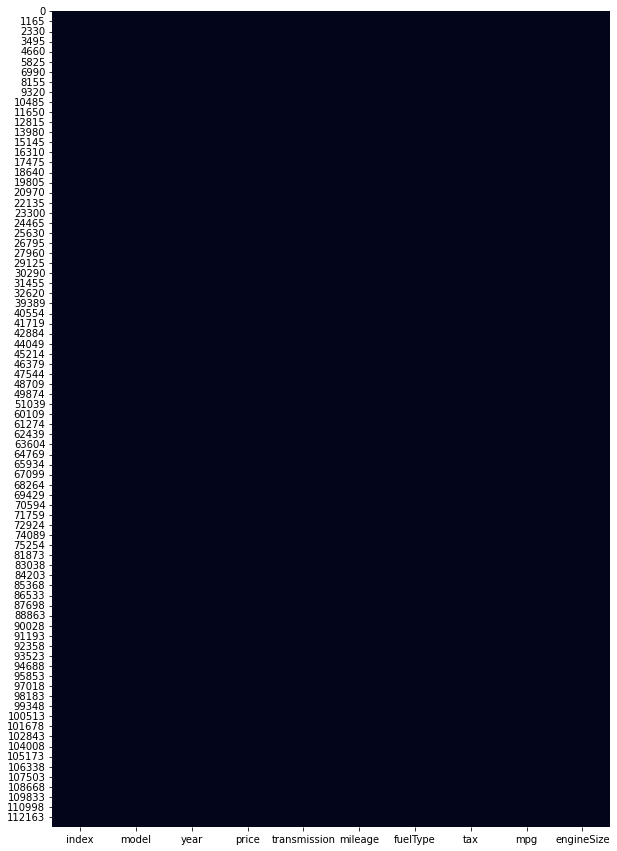

In [ ]:
df.drop(columns = df.columns[9:], inplace=True)
df.reset_index(inplace=True)
df.dropna(inplace=True)

figure(figsize = (10, 15))
sns.heatmap(df.isnull(), cbar=False)
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94327 entries, 0 to 113289
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         94327 non-null  int64  
 1   model         94327 non-null  object 
 2   year          94327 non-null  float64
 3   price         94327 non-null  object 
 4   transmission  94327 non-null  object 
 5   mileage       94327 non-null  object 
 6   fuelType      94327 non-null  object 
 7   tax           94327 non-null  float64
 8   mpg           94327 non-null  float64
 9   engineSize    94327 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 7.9+ MB


In [ ]:
df.describe()

,index,year,tax,mpg,engineSize
count,94327.000000,94327.000000,94327.000000,94327.000000,94327.000000
mean,56719.836346,2017.086698,120.256183,55.235816,1.673861
std,35046.756072,2.133897,63.404805,16.291667,0.562523
min,0.000000,1970.000000,0.000000,0.300000,0.000000
25%,23581.500000,2016.000000,125.000000,47.100000,1.300000
50%,60672.000000,2017.000000,145.000000,54.300000,1.600000
75%,89707.500000,2019.000000,145.000000,62.800000,2.000000
max,113289.000000,2060.000000,580.000000,470.800000,6.600000


In [ ]:
df.isnull().sum()

index           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
del df['index']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54ce0f2a50>,
      dtype=object)

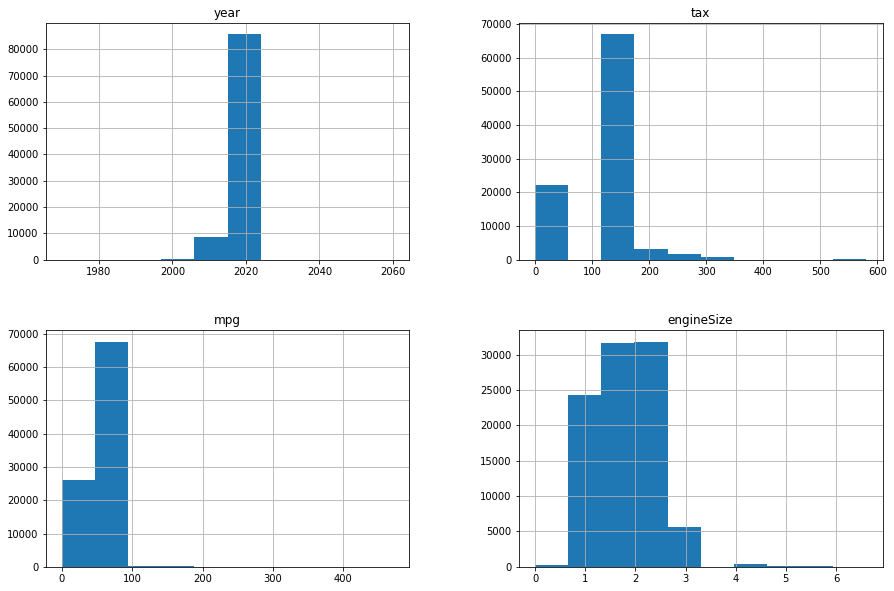

In [ ]:
df.hist(figsize=(15, 10))

In [ ]:
df['model'] = df['model'].apply(lambda x: x.strip())

In [ ]:
df['model'].value_counts()

Fiesta             6557
Golf               4863
Focus              4588
C Class            3747
Corsa              3441
                   ... 
A2                    1
Transit Tourneo       1
200                   1
Ranger                1
180                   1
Name: model, Length: 179, dtype: int64

In [ ]:
df.year.describe()

count    94327.000000
mean      2017.086698
std          2.133897
min       1970.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2060.000000
Name: year, dtype: float64

In [ ]:
df[df['year'] >= 2021]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99419,Fiesta,2060.0,6495,Automatic,54807,Petrol,205.0,42.8,1.4


In [ ]:
df = df[df['year'] < 2021]
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019.0,25000,Automatic,13904,Diesel,145.0,49.6,2.0
1,T-Roc,2019.0,26883,Automatic,4562,Diesel,145.0,49.6,2.0
2,T-Roc,2019.0,20000,Manual,7414,Diesel,145.0,50.4,2.0
3,T-Roc,2019.0,33492,Automatic,4825,Petrol,145.0,32.5,2.0
4,T-Roc,2019.0,22900,Semi-Auto,6500,Petrol,150.0,39.8,1.5
...,...,...,...,...,...,...,...,...,...
113285,Tigra,2007.0,2499,Manual,48640,Petrol,165.0,46.3,1.4
113286,Vectra,2007.0,1795,Manual,75000,Petrol,240.0,39.2,1.8
113287,Vectra,2005.0,1495,Manual,74000,Petrol,235.0,38.7,1.8
113288,Vectra,2008.0,1695,Automatic,131000,Diesel,200.0,39.8,1.9


In [ ]:
df.describe()

,year,tax,mpg,engineSize
count,94326.000000,94326.000000,94326.000000,94326.000000
mean,2017.086243,120.255285,55.235948,1.673864
std,2.129329,63.404540,16.291703,0.562525
min,1970.000000,0.000000,0.300000,0.000000
25%,2016.000000,125.000000,47.100000,1.300000
50%,2017.000000,145.000000,54.300000,1.600000
75%,2019.000000,145.000000,62.800000,2.000000
max,2020.000000,580.000000,470.800000,6.600000


Перекодировка позволит модели упростить обработку

In [ ]:
df['price'] = df['price'].astype('int')
df['year'] = df['year'].astype('object')
df['mpg'] = df['mpg'].astype('int')
df['mileage'] = df['mileage'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

# Кодировка

Рассмотрим 2 основных подхода к кодировке, выберем лучший по метрикам качества в алгоритмах

In [ ]:
from pandas.core.arrays import numeric
from sklearn.pipeline import make_pipeline # конвейер подготовки данных
from sklearn.pipeline import Pipeline # конвер алгоритмов
from sklearn.impute import SimpleImputer # пропуски заполняются медианными значениями
from sklearn.preprocessing import OneHotEncoder, StandardScaler # onehot encoding и стандартизации
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
# конвейер подготовки данных числового типа
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"),
                                    StandardScaler())

numeric_features = df.select_dtypes(include = np.number)
categorical_features = df.select_dtypes(exclude = np.number)

# конвейер подготовки данных категориального типа
preprocessor = ColumnTransformer(
    [
        ('num', numeric_transformer, numeric_features),
        (
            'cat',
            OneHotEncoder(handle_unknown='ignore', sparse=False),
            categorical_features
        )
    ],
    verbose_feature_names_out = False,
)

# подготовка и обучение алгоритма
alg = Pipeline(steps=[
    ('enc', preprocessor), # подготовка
    ('alg', RandomForestRegressor()) # алгоритм
])

# обучение алгоритма
alg.fit(X_train, y_train)

## Label encoder

In [ ]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            print(column)
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

# используем все, кроме описания
encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_data

model
year
transmission
fuelType


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,144,24,25000,0,13904,0,145.0,49,2.0
1,144,24,26883,0,4562,0,145.0,49,2.0
2,144,24,20000,1,7414,0,145.0,50,2.0
3,144,24,33492,0,4825,4,145.0,32,2.0
4,144,24,22900,3,6500,4,150.0,39,1.5
...,...,...,...,...,...,...,...,...,...
113285,146,12,2499,1,48640,4,165.0,46,1.4
113286,157,12,1795,1,75000,4,240.0,39,1.8
113287,157,10,1495,1,74000,4,235.0,38,1.8
113288,157,13,1695,0,131000,0,200.0,39,1.9


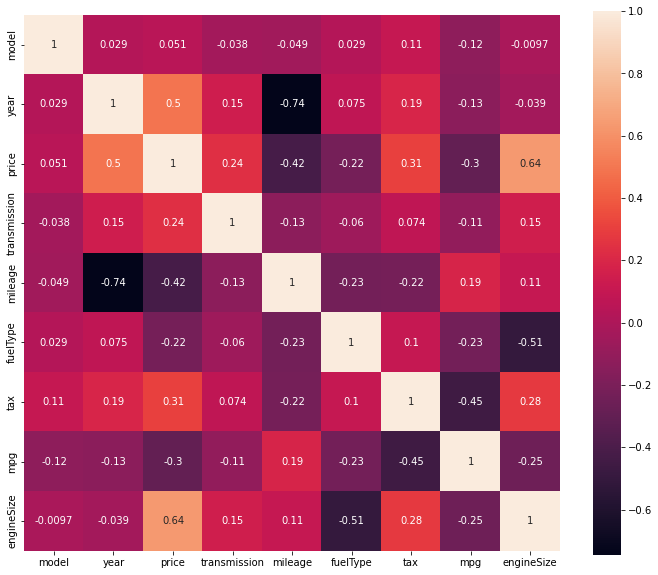

In [ ]:
plt.subplots(figsize=(12, 10))
sns.heatmap(encoded_data.corr(), square = True, annot=True)
plt.show()

Видим, что присутсвуют линейные корреляции, неплохой результат выдадут даже самые простые модели.

## One-hot

In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,T-Roc,2019.0,25000,Automatic,13904,Diesel,145.0,49,2.0
1,1,T-Roc,2019.0,26883,Automatic,4562,Diesel,145.0,49,2.0
2,2,T-Roc,2019.0,20000,Manual,7414,Diesel,145.0,50,2.0
3,3,T-Roc,2019.0,33492,Automatic,4825,Petrol,145.0,32,2.0
4,4,T-Roc,2019.0,22900,Semi-Auto,6500,Petrol,150.0,39,1.5
...,...,...,...,...,...,...,...,...,...,...
94321,113285,Tigra,2007.0,2499,Manual,48640,Petrol,165.0,46,1.4
94322,113286,Vectra,2007.0,1795,Manual,75000,Petrol,240.0,39,1.8
94323,113287,Vectra,2005.0,1495,Manual,74000,Petrol,235.0,38,1.8
94324,113288,Vectra,2008.0,1695,Automatic,131000,Diesel,200.0,39,1.9


In [ ]:
# data_onehot = pd.get_dummies(df, columns=['model', 'transmission','fuelType'])

from sklearn.preprocessing import OneHotEncoder
# выделяем в DataFrame категориальные колонки (тип - object)
categor = df[['model', 'transmission','fuelType', 'year']]

# в случае, если появляется неизвестных новых - игнорируем
enc = OneHotEncoder(handle_unknown='ignore')
# выбираем какие на основе каких признаков производить преобразования
enc.fit(categor)
# производим преобразования категориальных
codes = enc.transform(categor).toarray()
# выделим названия категориальных колонок из тех, на основе которых преобразуем
feature_names = enc.get_feature_names(categor.columns)
# объединяем числовые и категориальные колонки

data_onehot = pd.concat([df[['price', 'mileage', 'tax', 'mpg', 'engineSize']], # исключаем категориальные = выбираем цифровые
                        pd.DataFrame(codes,columns=feature_names)], axis = 1) # выбираем закодированные

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
data_onehot

,price,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,...,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
0,25000,13904,145.0,49,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,26883,4562,145.0,49,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20000,7414,145.0,50,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33492,4825,145.0,32,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22900,6500,150.0,39,1.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94321,2499,48640,165.0,46,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94322,1795,75000,240.0,39,1.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94323,1495,74000,235.0,38,1.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94324,1695,131000,200.0,39,1.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_onehot.isna().sum()

price          0
mileage        0
tax            0
mpg            0
engineSize     0
              ..
year_2016.0    0
year_2017.0    0
year_2018.0    0
year_2019.0    0
year_2020.0    0
Length: 219, dtype: int64

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(
#     [('one_hot_encoder', OneHotEncoder(categories='auto', sparse=False), [0, 1, 2, 4])],
#     remainder='passthrough'                                      
# )

# X = ct.fit_transform(df.drop(columns=['price']).values )

# # enc.get_feature_names()
# X

array([[0.0, 0.0, 0.0, ..., 145.0, 49, 2.0],
       [0.0, 0.0, 0.0, ..., 145.0, 49, 2.0],
       [0.0, 0.0, 0.0, ..., 145.0, 50, 2.0],
       ...,
       [0.0, 0.0, 0.0, ..., 235.0, 38, 1.8],
       [0.0, 0.0, 0.0, ..., 200.0, 39, 1.9],
       [0.0, 0.0, 0.0, ..., 330.0, 27, 3.2]], dtype=object)

In [ ]:
# ct.get_feature_names()

NotImplementedError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94326 entries, 0 to 113289
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         94326 non-null  object 
 1   year          94326 non-null  object 
 2   price         94326 non-null  int64  
 3   transmission  94326 non-null  object 
 4   mileage       94326 non-null  int64  
 5   fuelType      94326 non-null  object 
 6   tax           94326 non-null  float64
 7   mpg           94326 non-null  int64  
 8   engineSize    94326 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 9.7+ MB


In [ ]:
data_onehot

,price,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,...,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
0,25000,13904,145.0,49,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,26883,4562,145.0,49,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20000,7414,145.0,50,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33492,4825,145.0,32,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22900,6500,150.0,39,1.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94321,2499,48640,165.0,46,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94322,1795,75000,240.0,39,1.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94323,1495,74000,235.0,38,1.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94324,1695,131000,200.0,39,1.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(94326, 10)

In [ ]:
data_onehot.reset_index(inplace=True)
data_onehot.shape

(94326, 220)

In [ ]:
data_onehot.head()

,index,price,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,model_230,model_3 Series,model_4 Series,model_5 Series,model_6 Series,model_7 Series,model_8 Series,model_A Class,model_A1,model_A2,model_A3,model_A4,model_A5,model_A6,model_A7,model_A8,model_Adam,model_Agila,model_Amarok,model_Ampera,model_Antara,model_Arteon,model_Astra,model_Auris,model_Avensis,model_Aygo,model_B Class,model_B-MAX,model_Beetle,...,model_Z4,model_Zafira,model_Zafira Tourer,model_i3,model_i8,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,year_1970.0,year_1996.0,year_1997.0,year_1998.0,year_1999.0,year_2000.0,year_2001.0,year_2002.0,year_2003.0,year_2004.0,year_2005.0,year_2006.0,year_2007.0,year_2008.0,year_2009.0,year_2010.0,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
0,0,25000,13904,145.0,49,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,26883,4562,145.0,49,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,20000,7414,145.0,50,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,33492,4825,145.0,32,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,22900,6500,150.0,39,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
del data_onehot['index']

In [ ]:
# названия признаков - запомним, понадобится при оценки важности признаков
one_hot_feature_names = data_onehot.columns.values
one_hot_feature_names

array(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_1 Series',
       'model_180', 'model_2 Series', 'model_200', 'model_220',
       'model_230', 'model_3 Series', 'model_4 Series', 'model_5 Series',
       'model_6 Series', 'model_7 Series', 'model_8 Series',
       'model_A Class', 'model_A1', 'model_A2', 'model_A3', 'model_A4',
       'model_A5', 'model_A6', 'model_A7', 'model_A8', 'model_Adam',
       'model_Agila', 'model_Amarok', 'model_Ampera', 'model_Antara',
       'model_Arteon', 'model_Astra', 'model_Auris', 'model_Avensis',
       'model_Aygo', 'model_B Class', 'model_B-MAX', 'model_Beetle',
       'model_C Class', 'model_C-HR', 'model_C-MAX', 'model_CC',
       'model_CL Class', 'model_CLA Class', 'model_CLC Class',
       'model_CLK', 'model_CLS Class', 'model_Caddy', 'model_Caddy Life',
       'model_Caddy Maxi', 'model_Caddy Maxi Life', 'model_California',
       'model_Camry', 'model_Caravelle', 'model_Cascada', 'model_Citigo',
       'model_Combo Life', 'mo

## Train-test split

Разделим на треин-тест для обоих методов кодировки

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_onehot.drop(columns=['price']), data_onehot['price'], test_size=0.2)

In [ ]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(encoded_data.drop(['price'], axis=1), encoded_data['price'], test_size=0.2)

# Алгоритмы

## Linear model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_, y_train_)

from sklearn import metrics
preds = regressor.predict(X_test_)

print(metrics.r2_score(y_test_, preds))

0.709174200530864


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

from sklearn import metrics
preds = regressor.predict(X_test)

print(metrics.r2_score(y_test, preds))

0.8716435872494679


## Ridge

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
?Ridge

In [ ]:
from sklearn.linear_model import Ridge, ElasticNet

ridge = Ridge(alpha=1)

ridge.fit(X_train_, y_train_)

metrics.r2_score(y_test_, ridge.predict(X_test_))

0.709174295055621

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('ridge', Ridge())])

pipe.fit(X_train_, y_train_)

metrics.r2_score(y_test_, pipe.predict(X_test_))

0.7091742011764905

## SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('ridge', SVR())])

pipe.fit(X_train_, y_train_)

metrics.r2_score(y_test_, pipe.predict(X_test_))

0.298441079094943

## Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

# перебираем глубину
# перебираем мин кол-во для разделения
# максимально кол-во признаков для более случайной выборки
param_grid = {'max_depth': [i for i in range(2, 15)],
              'min_samples_split': [i for i in range(2, 10)],
              'max_features': [2, X_train_.values.shape[0]-1]}

# инициализируем случайный лес с перебором по кросс-вал на выбранных выше праметрах
gs = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)
gs.fit(X_train_.values, y_train_.values)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 208 candidates, totalling 1040 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
520 fits failed out of a total of 1040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
520 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in 

({'max_depth': 14, 'max_features': 2, 'min_samples_split': 9},
 0.8951432632011675)

In [ ]:
metrics.r2_score(y_test_, gs.predict(X_test_))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.908460111137425

In [ ]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=14, max_features=2, min_samples_split=9)

[Text(602.5275525560339, 1050.96, 'X[7] <= 1.95\nmse = 99576385.127\nsamples = 75460\nvalue = 16991.797'),
 Text(305.65164036079096, 978.48, 'X[2] <= 1.5\nmse = 28833401.709\nsamples = 45017\nvalue = 12680.784'),
 Text(146.4303501794465, 906.0, 'X[2] <= 0.5\nmse = 24371688.603\nsamples = 39889\nvalue = 12049.189'),
 Text(49.82246014217683, 833.52, 'X[5] <= 130.0\nmse = 39954012.987\nsamples = 5614\nvalue = 16088.758'),
 Text(25.918558906756854, 761.04, 'X[1] <= 21.5\nmse = 16113374.123\nsamples = 1629\nvalue = 12984.038'),
 Text(17.42907550555594, 688.56, 'X[0] <= 177.5\nmse = 13036200.034\nsamples = 1150\nvalue = 12212.867'),
 Text(13.739146939057218, 616.08, 'X[7] <= 1.7\nmse = 8696969.696\nsamples = 1145\nvalue = 12075.482'),
 Text(6.8214335012768315, 543.6, 'X[1] <= 20.5\nmse = 6064961.594\nsamples = 781\nvalue = 11355.866'),
 Text(2.8113741459037893, 471.12, 'X[0] <= 26.0\nmse = 4933857.48\nsamples = 315\nvalue = 10200.619'),
 Text(1.3094071364483402, 398.64, 'X[3] <= 50121.5\nmse

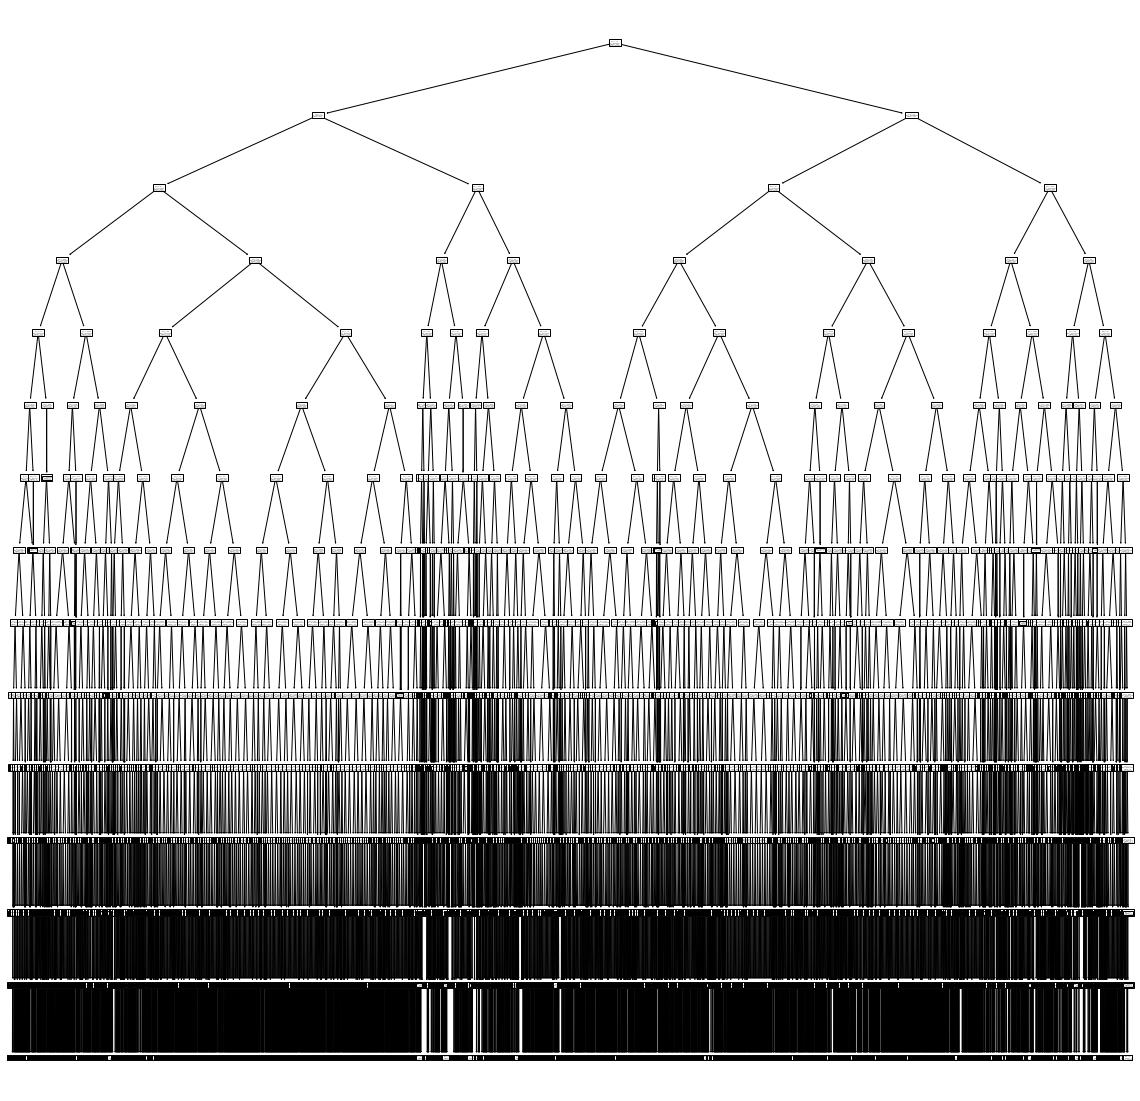

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20)) 
plot_tree(gs.best_estimator_)

## Decision Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train_, y_train_)

metrics.r2_score(y_test_, rf.predict(X_test_))

0.9609064044930583

In [ ]:
from sklearn.model_selection import GridSearchCV

# перебираем глубину
# перебираем мин кол-во для разделения
# максимально кол-во признаков для более случайной выборки
param_grid = {'max_depth': [i for i in range(2, 15)],}
            #   'min_samples_split': [i for i in range(2, 10)],
            #   'max_features': [2, X_train_.values.shape[0]-1]}

# инициализируем случайный лес с перебором по кросс-вал на выбранных выше праметрах
gs = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)
gs.fit(X_train_.values, y_train_.values)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 13 candidates, totalling 65 fits


KeyboardInterrupt: ignored

In [ ]:
metrics.r2_score(y_test_, gs.predict(X_test_))

0.9499657897890319

In [ ]:
def plot_feature_importances(gs, column_names, top_n = 15):
    imp = pd.Series(gs.best_estimator_.feature_importances_, index = column_names).sort_values(ascending=False)
    plt.figure(figsize=(10, 10))
    plt.title('Важность признаков по Giny Impurity')
    sns.barplot(x = imp.values[:top_n], y = imp.index.values[:top_n], orient='h')

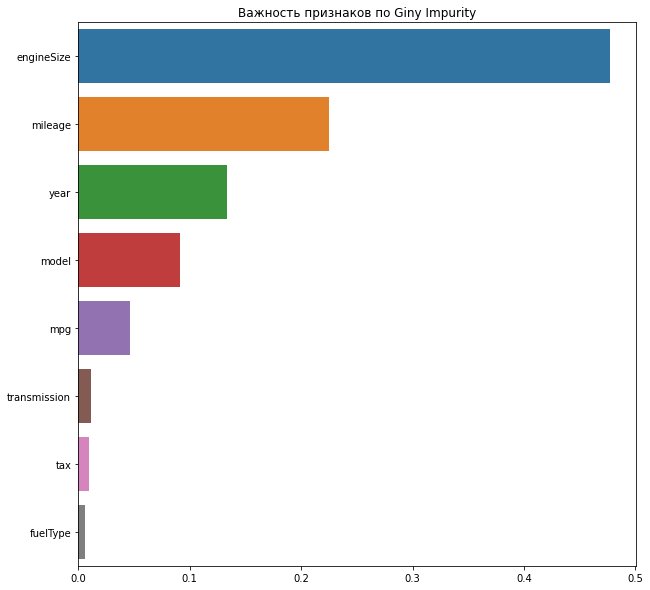

In [ ]:
plot_feature_importances(gs, encoded_data.drop(columns=['price']).columns)

In [ ]:
encoded_data.drop(columns=['price']).columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

# Сравнение разделяющих поверхностей

In [ ]:
#@title Код генерации датасета с занятия
def devil(N, D=2, K=3):
    N = 100
    D = 2
    K = 3
    X = np.zeros((N * K, D))
    y = np.zeros(N * K, dtype='uint8')

    for j in range(K):
        ix = range(N * j,N * (j + 1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j

    X[:, 0] += np.random.normal(loc=0, scale=0.15, size=300)
    X[:, 1] += np.random.normal(loc=0, scale=0.15, size=300)
    return X, y

In [ ]:
X, y = devil(100)

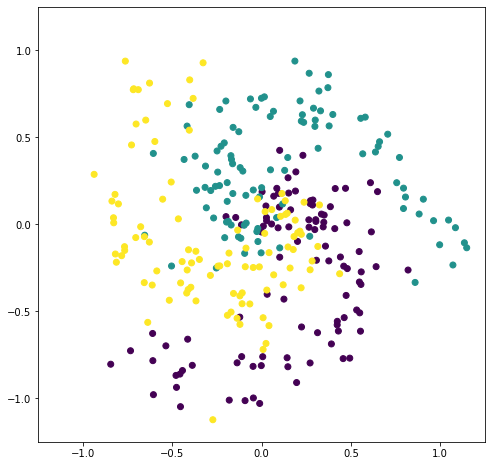

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(X[:,0], X[:,1], c=y)

plt.xlim([-1.25, 1.25])
plt.ylim([-1.25, 1.25])

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [DecisionTreeClassifier(max_depth=10), 
          RandomForestClassifier(max_depth=10)]

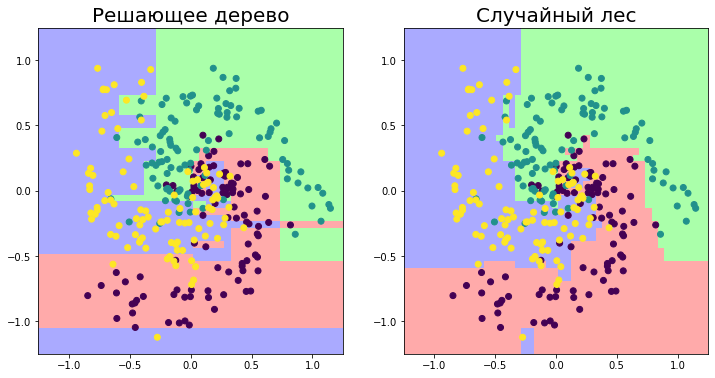

In [ ]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=(12,6))
plt.title('Max depth = 7')

name = {0:'Решающее дерево', 1:'Случайный лес'}
for i, model in enumerate(models):
    model.fit(X, y)

    plt.subplot(1, 2, i+1)
    plt.xlim((-1.25, 1.25))
    plt.ylim((-1.25, 1.25))
    xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 50),
                         np.linspace(-1.25, 1.25, 50))
    plt.gca().set_title(name[i], fontsize=20)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()